In [80]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [81]:
X, y = make_blobs(centers=2, random_state=0)

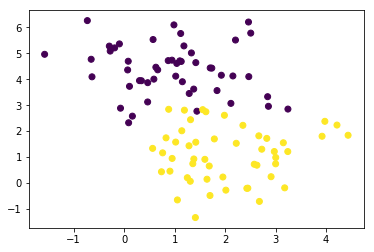

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [83]:
point = np.array([1, 3])

In [84]:
arr = np.sum((X - point)**2, axis=1)

arr.argsort()[:5]

nearest = X[arr.argsort()[:5]]

In [85]:
X[:5]

array([[ 4.21850347,  2.23419161],
       [ 0.90779887,  0.45984362],
       [-0.27652528,  5.08127768],
       [ 0.08848433,  2.32299086],
       [ 3.24329731,  1.21460627]])

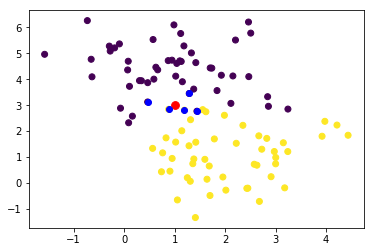

In [86]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(point[0], point[1], s=60, color="red")
plt.scatter(nearest[:, 0], nearest[:, 1], color="blue")

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [107]:
model = KNeighborsClassifier(n_neighbors=5)

In [108]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [109]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [110]:
y_test[:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [111]:
model.score(X_test, y_test)

0.9696969696969697

In [102]:
class KNNCustom:
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict_point(self, point):
        
        distances = np.sum((self.X - point)**2, axis=1)
        nearest = self.y[distances.argsort()[:self.n_neighbors]]
        
        items, counts = np.unique(nearest, return_counts=True)
        
        return items[counts.argmax()]
    
    
    def predict(self, X):
        
        result = []
        
        for point in X:
            result.append(self.predict_point(point))
        
        return np.array(result)
    
    def score(self, X, y):
        
        yp = self.predict(X)
        
        return (yp == y).mean()
        
        

In [130]:
accs = []

for n in range(1, 40):

    model = KNNCustom(n_neighbors=n)

    model.fit(X_train, y_train)

    model.predict_point(np.array([2, 3]))

    accs.append(model.score(X_test, y_test))

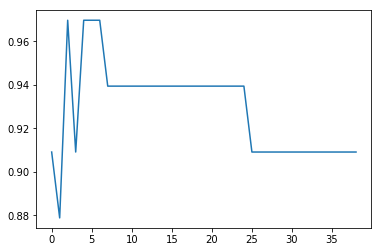

In [131]:
plt.plot(accs)